In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.options.display.max_rows = 6000


In [2]:
data = pd.read_csv('merged_data.csv')


In [3]:
data.index = pd.to_datetime(data.index)
data = data.reset_index(drop=True)
data.index = data['Date']

Сначала построим регрессию, учитывая суммарное потребление за минуту и предсказывая суммарное потребление в следующую минуту.

In [15]:
total_demand = data.loc[:, data.columns.str.contains('kW')].copy().sum(axis=1).rename('sum').to_frame()
total_demand.index = pd.to_datetime(total_demand.index)
total_demand['lag_1'] = total_demand.shift(1)
total_demand = total_demand.dropna(axis=0)
total_demand.isnull().sum()

sum      0
lag_1    0
dtype: int64

In [16]:
total_demand

,sum,lag_1
Date,,
2018-07-01 00:01:00,176.040000,176.310000
2018-07-01 00:02:00,174.540000,176.040000
2018-07-01 00:03:00,175.720000,174.540000
2018-07-01 00:04:00,174.900000,175.720000
2018-07-01 00:05:00,174.330000,174.900000
...,...,...
2019-12-31 23:55:00,102.117671,101.537671
2019-12-31 23:56:00,113.127671,102.117671
2019-12-31 23:57:00,145.017671,113.127671


In [17]:
y = total_demand['sum']
X = total_demand.drop(columns='sum')                                             
#Split the data into train and test sets
cutoff = int(len(X) * 0.8)
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

In [18]:
X_test

,lag_1
Date,
2019-09-13 04:48:00,146.890000
2019-09-13 04:49:00,146.910000
2019-09-13 04:50:00,146.530000
2019-09-13 04:51:00,146.250000
2019-09-13 04:52:00,147.460000
...,...
2019-12-31 23:55:00,101.537671
2019-12-31 23:56:00,102.117671
2019-12-31 23:57:00,113.127671


In [19]:
y_test

Date
2019-09-13 04:48:00    146.910000
2019-09-13 04:49:00    146.530000
2019-09-13 04:50:00    146.250000
2019-09-13 04:51:00    147.460000
2019-09-13 04:52:00    147.510000
                          ...    
2019-12-31 23:55:00    102.117671
2019-12-31 23:56:00    113.127671
2019-12-31 23:57:00    145.017671
2019-12-31 23:58:00    131.327671
2019-12-31 23:59:00     92.677671
Name: sum, Length: 158112, dtype: float64

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 7.49
Test MAE: 9.01


In [22]:
training_mape = mean_absolute_percentage_error(y_train, model.predict(X_train))
test_mape = mean_absolute_percentage_error(y_test, model.predict(X_test))
print(f"\n\nTraining MAPE: {round(training_mape, 4)*100} %")
print(f"Test MAPE: {round(test_mape, 5) *100} %")



Training MAPE: 3.6999999999999997 %
Test MAPE: 5.364 %


In [23]:
model.coef_

array([0.99574311])

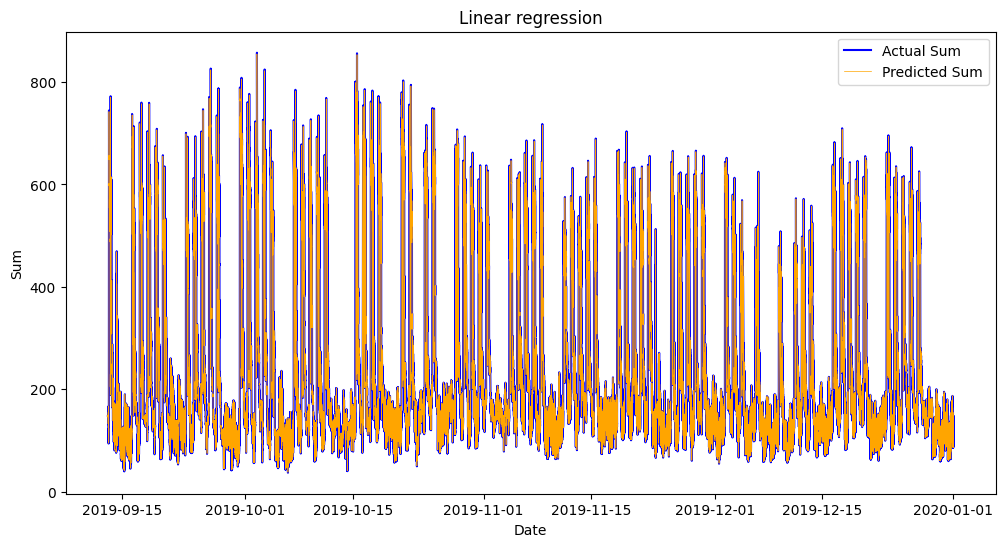

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(total_demand[cutoff:].index, y_test, color='blue', linewidth=1.5, label='Actual Sum')
plt.plot(total_demand[cutoff:].index, model.predict(X_test), color='orange', linewidth=0.5, label='Predicted Sum')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Linear regression')
plt.legend()
plt.show()

In [25]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

In [ ]:
training_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 6.34
Test MAE: 11.88


In [ ]:
training_mape = mean_absolute_percentage_error(y_train, train_pred)
test_mape = mean_absolute_percentage_error(y_test, test_pred)
print(f"\n\nTraining MAPE: {round(training_mape, 5)*100} %")
print(f"Test MAPE: {round(test_mape, 5) *100} %")



Training MAPE: 3.438 %
Test MAPE: 7.134 %


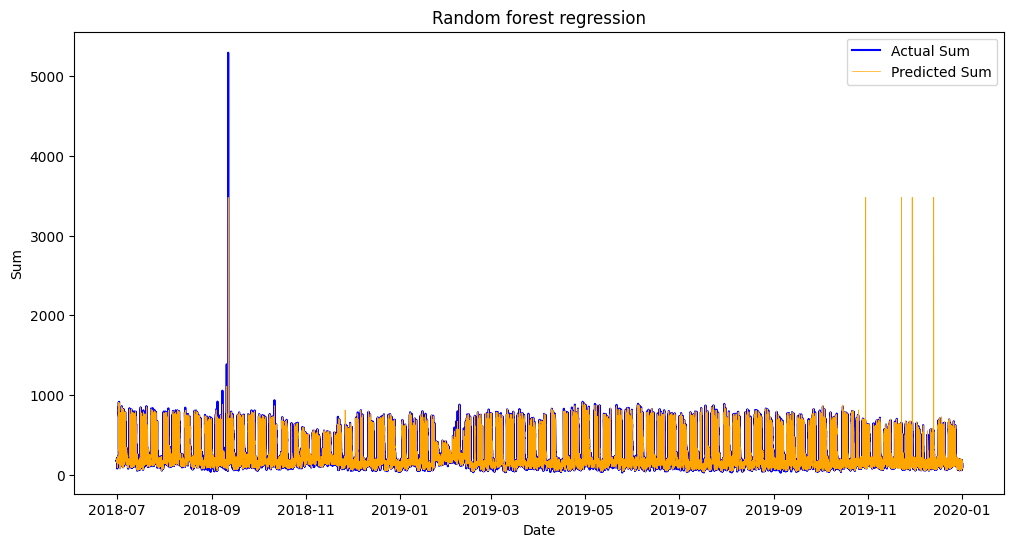

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(total_demand[:cutoff].index, y_train, label='Actual Sum', color='blue')
plt.plot(total_demand[cutoff:].index, y_test, color='blue')
plt.plot(total_demand[:cutoff].index, train_pred, label='Predicted Sum', color='orange', linewidth=0.5)
plt.plot(total_demand[cutoff:].index, test_pred, color='orange', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Random forest regression')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


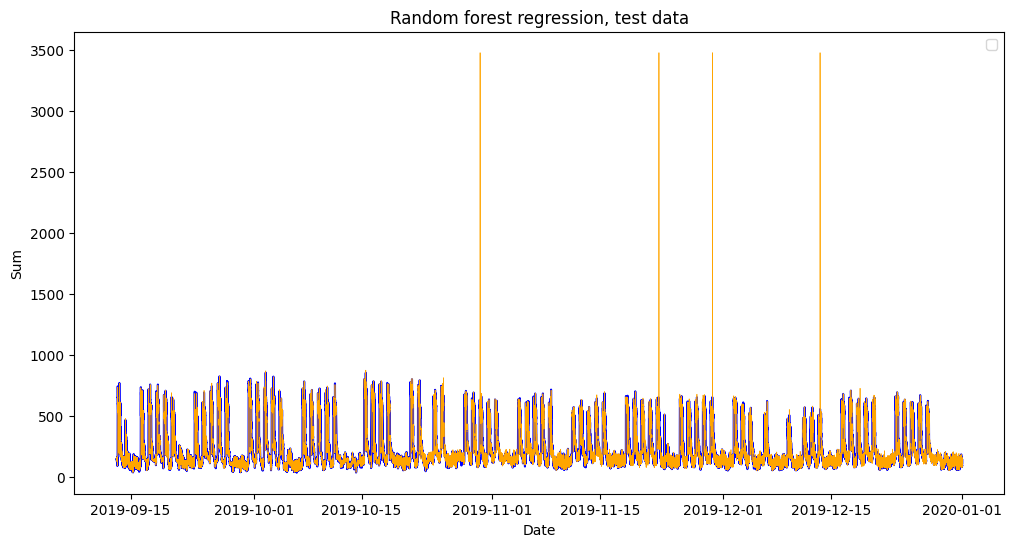

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(total_demand[cutoff:].index, y_test, color='blue')
plt.plot(total_demand[cutoff:].index, test_pred, color='orange', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Random forest regression, test data')
plt.legend()
plt.show()

Теперь обучим регрессии на данных о влажности, освещенности и температуре в помещении

In [4]:
data.index = pd.to_datetime(data.index)

In [2]:
X = pd.read_csv('data_with_weather_wo_outliers.csv')
X = X.set_index('Date')
X.index = pd.to_datetime(X.index)
y = X.loc[:, 'total_demand'].copy()
X = X.drop(['total_demand'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

# %%
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

# %%
training_mape = mean_absolute_percentage_error(y_train, model.predict(X_train))
test_mape = mean_absolute_percentage_error(y_test, model.predict(X_test))
print(f"\n\nTraining MAPE: {round(training_mape, 4)*100} %")
print(f"Test MAPE: {round(test_mape, 5) *100} %")


Training MAE: 67.66
Test MAE: 49.03


Training MAPE: 33.21 %
Test MAPE: 27.306 %


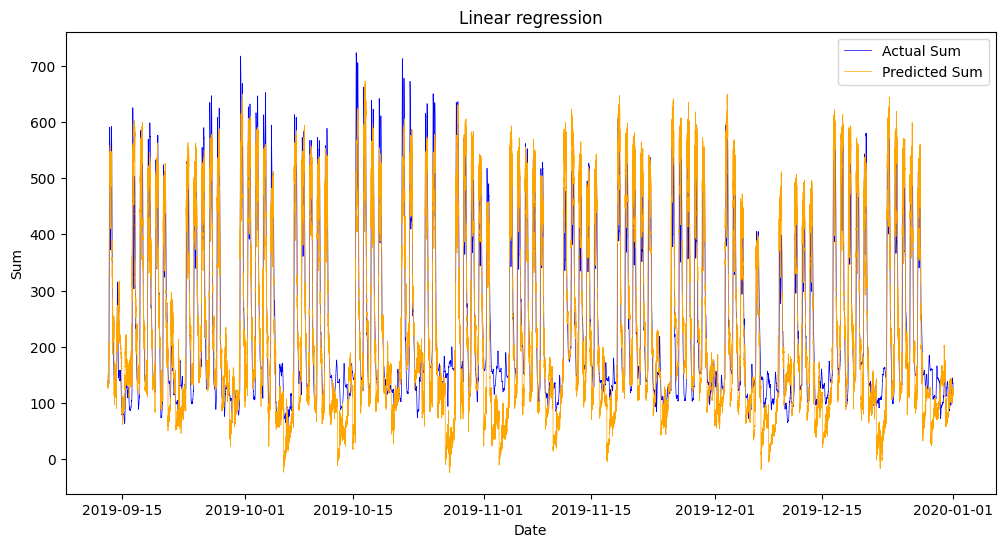

In [15]:
cutoff = int(len(X) * 0.8)
plt.figure(figsize=(12, 6))
plt.plot(X[cutoff:].index, y_test, color='blue', linewidth=0.5, label='Actual Sum')
plt.plot(X[cutoff:].index, model.predict(X_test), label='Predicted Sum', color='orange', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Linear regression')
plt.legend()
plt.show()

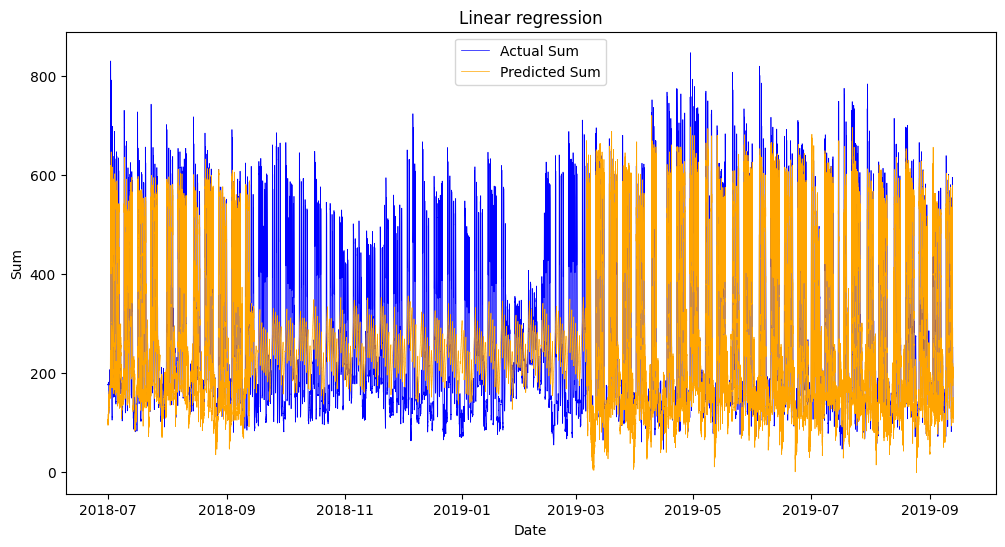

In [16]:
cutoff = int(len(X) * 0.8)
plt.figure(figsize=(12, 6))
plt.plot(X[:cutoff].index, y_train, color='blue', linewidth=0.5, label='Actual Sum')
plt.plot(X[:cutoff].index, model.predict(X_train), label='Predicted Sum', color='orange', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Linear regression')
plt.legend()
plt.show()

In [3]:
#rf_model = RandomForestRegressor(n_jobs=1, verbose=2, max_features='sqrt', max_depth=150)
rf_model = RandomForestRegressor(verbose=2, max_features='sqrt', max_depth=100)
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.3min finished


RandomForestRegressor(max_depth=100, max_features='sqrt', verbose=2)

In [4]:
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


In [5]:
training_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

# %%
training_mape = mean_absolute_percentage_error(y_train, train_pred)
test_mape = mean_absolute_percentage_error(y_test, test_pred)
print(f"\n\nTraining MAPE: {round(training_mape, 4)*100} %")
print(f"Test MAPE: {round(test_mape, 5) *100} %")

Training MAE: 3.75
Test MAE: 51.48


Training MAPE: 1.28 %
Test MAPE: 33.683 %


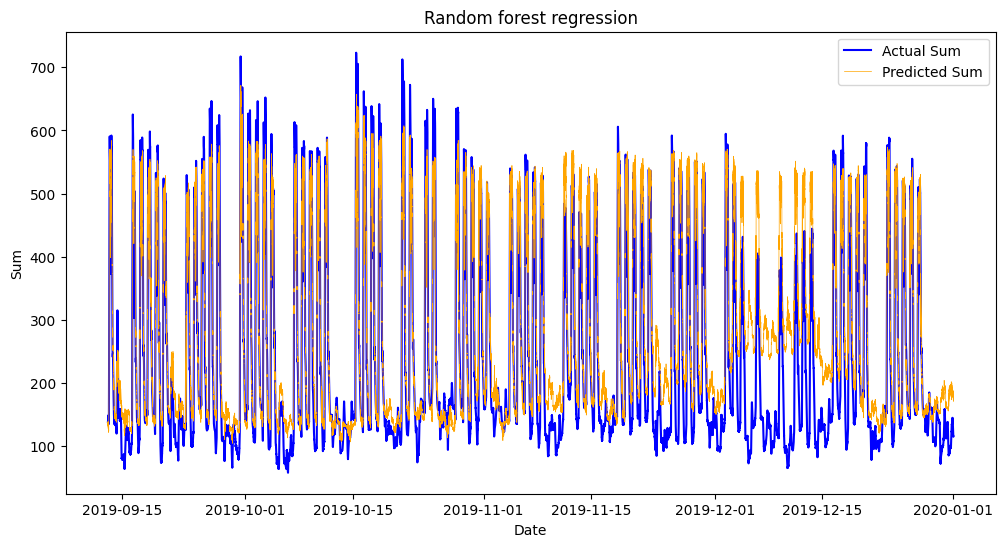

In [20]:
cutoff = int(len(X) * 0.8)
plt.figure(figsize=(12, 6))
plt.plot(X[cutoff:].index, y_test, color='blue', label='Actual Sum')
plt.plot(X[cutoff:].index, test_pred, color='orange', linewidth=0.5, label='Predicted Sum')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Random forest regression')
plt.legend()
plt.show()

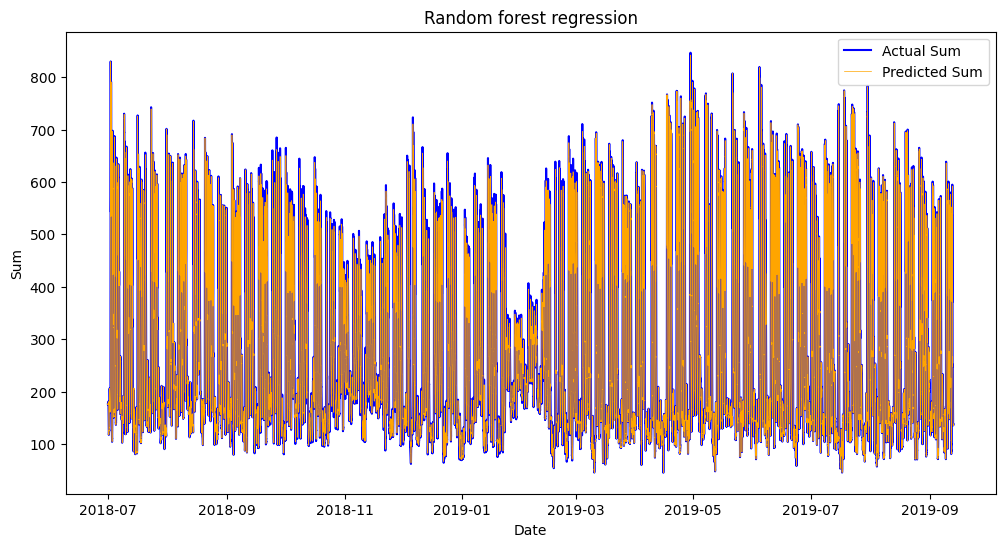

In [21]:
cutoff = int(len(X) * 0.8)
plt.figure(figsize=(12, 6))
plt.plot(X[:cutoff].index, y_train, color='blue', label='Actual Sum')
plt.plot(X[:cutoff].index, train_pred, color='orange', linewidth=0.5, label='Predicted Sum')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Random forest regression')
plt.legend()
plt.show()